# Wine quality analysis with decision trees

The file `wine_quality.csv` contains information about chemical properties of some wines. Let's see if what we learned so far can help us to predict if a wine will be good based on its properties.

## Load, examine, clean, prepare

In [1]:
# Read and parse the wine_quality.csv file.
import pandas as pd
data = pd.read_csv("wine_quality.csv");
# print first 5 rows
data[:5] # or data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [2]:
# How many rows and columns does the dataset have ?
"there is {} rows and {} columns".format(*data.shape)

'there is 6497 rows and 13 columns'

In [3]:
# List all chemical properties of this dataset.
list(data) # or list(data.columns)

['type',
 'fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [4]:
# What kind of wines are present in this dataset ?
list(data['type'].unique()) # or list(data.type.unique())

['white', 'red']

In [5]:
# Find the right method to get the average/minimum/maximum value
# of each column (and only these 3 information per column)
import numpy as np
func = [np.mean, min, max]
data.aggregate(func)
# alternativly, the method data.describe() give us a lot of usefull stats on the columns.
# we can then choose the ones we want: data.describe().log[["mean","min","max"]]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
min,red,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
max,white,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000
mean,NaN,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378


In [6]:
# Does this dataset have any missing information ?
# How many missing values ?
# Which column has the most missing values ?
print("there is", data.isna().values.sum(), "missing values:")
data.isna().sum() # alternatively, data.info() displays the number of non-null objects 

there is 38 missing values:


type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [7]:
# Remove the rows which have at least 1 missing value.
# How many rows have been removed ?
clean_data = data.dropna()
print(data.shape[0] - clean_data.shape[0], "rows have been removed")
data = clean_data

34 rows have been removed


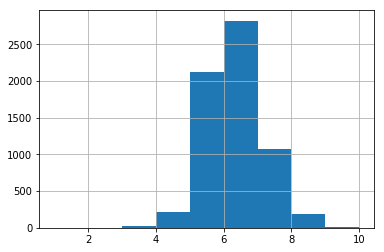

In [8]:
# Use an histogram to see see the repartition of
# the wine quality.
import matplotlib.pyplot as plt
%matplotlib inline
data.quality.hist(bins=[i for i in range(1,11)]);

In [9]:
# Let's consider that a wine is good if its quality is
# at least 7. Replace the values in the "quality" column
# with "good" if quality >= 7 and with "not good" otherwise.
to_replace = {mark: "good" if mark>=7 else "not good" for mark in range(10)}
data.quality = data.quality.replace(to_replace=to_replace)
data

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,not good
1,white,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,not good
2,white,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,not good
3,white,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,not good
4,white,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,not good
5,white,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,not good
6,white,6.2,0.320,0.16,7.00,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,not good
7,white,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,not good
8,white,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,not good
9,white,8.1,0.220,0.43,1.50,0.044,28.0,129.0,0.99380,3.22,0.45,11.0,not good


In [10]:
# Create the input data (i.e. the properties) and the
# label (i.e. the quality of wine) and assign them
# to 2 different variables X and y. Our machine learning
# algorithm needs to have both input and output data.
X = data.drop('quality', axis=1)
y = data.quality
print("X:",list(X))
print("y:",y.name)

X: ['type', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
y: quality


In [11]:
# Separate your data into a training and a test set
# with 80% for the training set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Predicting wine quality with a decision tree

In [12]:
# Is this a classification or a regression problem ?
print("this is a classification problem")
# Import the appropriate version of DecisionTree, then
# train it with your training data.
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
try:
    model.fit(X_train, y_train)
except Exception as e:
    print("ERROR:", e)

this is a classification problem
ERROR: could not convert string to float: 'white'


In [13]:
# Oops, it seems that there is a problem! Indeed, most
# machine learning algorithms only work with numerical vectors.
# And our current training data still have some string values
# (like the type or the quality). We need to transform them before
# training our model.

# sklearn comes with tools to transform non-numerical values.
# In our case, we are going to use a LabelEncoder. Look at the
# documentation to learn what is does.

from sklearn.preprocessing import LabelEncoder

#LabelEncoder? # display help

# now create two encoders: one for the `type` in X, the other
# for the `quality` in y. Use the trained encoders to transform
# X_train, X_test, y_train and y_test.

# for X:
encoder_type = LabelEncoder()
encoder_type.fit(X["type"])
X_train["type"] = encoder_type.transform(X_train["type"])
X_test["type"] = encoder_type.transform(X_test["type"])

# for y:
encoder_quality = LabelEncoder()
encoder_quality.fit(y)
y_train = encoder_quality.transform(y_train)
y_test = encoder_quality.transform(y_test)

C:\anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [14]:
# Now train again your Decision Tree.
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [15]:
# What is the accuracy of your model (both on training
# and test sets) ? Do you think we are underfitting ? Overfitting ?
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

1.0
0.8298530549110595


In [16]:
# Look at the documentation of your DecisionTree model
# and try to tune the hyperparameters: create other models
# with different values for max_depth, min_samples_split, max_features...
# Train them and evaluate their accuracy. What is the best accuracy
# you obtain?

for max_features in range(1, len(list(X_test))+1):
    model = DecisionTreeClassifier(max_features=max_features, random_state=0)
    model.fit(X_train, y_train)
    print("max_features =", max_features)
    print(" | score (train, test) =", (model.score(X_train, y_train), model.score(X_test, y_test)))
print('-'*79)
max_features=7
print("best max_features seems to be", max_features)

print('-'*79)
for max_depth in range(1,50,3):
    model = DecisionTreeClassifier(max_features=max_features, max_depth=max_depth, random_state=0)
    model.fit(X_train, y_train)
    print("max_features =", max_features, "; max_depth =", max_depth)
    print(" | score (train, test) =", (model.score(X_train, y_train), model.score(X_test, y_test)))
print('-'*79)
max_depth=16
print("best max_depth seems to be", max_depth)
    
print('-'*79)
model = DecisionTreeClassifier(max_features=max_features, max_depth=max_depth, random_state=0)
model.fit(X_train, y_train)
print("max_features =", max_features, "; max_depth =", max_depth)
print(" | score (train, test) =", (model.score(X_train, y_train), model.score(X_test, y_test)))
print('-'*79)
print("NB: by doing this, we may overfit our test set, which is actually a validation set.")
print("We should have another test set to estimate this")


max_features = 1
 | score (train, test) = (1.0, 0.8290796597061099)
max_features = 2
 | score (train, test) = (1.0, 0.831399845320959)
max_features = 3
 | score (train, test) = (1.0, 0.831399845320959)
max_features = 4
 | score (train, test) = (1.0, 0.8337200309358082)
max_features = 5
 | score (train, test) = (1.0, 0.8275328692962104)
max_features = 6
 | score (train, test) = (1.0, 0.822892498066512)
max_features = 7
 | score (train, test) = (1.0, 0.8499613302397525)
max_features = 8
 | score (train, test) = (1.0, 0.8321732405259087)
max_features = 9
 | score (train, test) = (1.0, 0.8259860788863109)
max_features = 10
 | score (train, test) = (1.0, 0.8437741686001546)
max_features = 11
 | score (train, test) = (1.0, 0.8344934261407579)
max_features = 12
 | score (train, test) = (1.0, 0.8244392884764115)
-------------------------------------------------------------------------------
best max_features seems to be 7
------------------------------------------------------------------------

In [17]:
# Use the feature_importances_ attribute of your best model. What are
# the three most important features to evaluate the quality of a wine?
d = pd.DataFrame(100 * model.feature_importances_, index=X.columns, columns=["importance (en %)"])
d.sort_values(by="importance (en %)", ascending=False)

,importance (en %)
alcohol,23.419521
volatile acidity,10.986711
density,9.832680
sulphates,8.546817
free sulfur dioxide,8.306947
pH,7.723576
citric acid,6.774996
chlorides,6.691725
total sulfur dioxide,6.633750
fixed acidity,5.572191


## Predicting wine quality with random forests

We saw in the course (and in this example) that Decision Trees can easily overfit. To prevent this, we can use Random forests instead. Random forests are a collection of decision trees, where each decision tree is trained differently. The prediction of the RandomForest is then the average (or the most frequent) prediction of all the decision trees.

In [18]:
# Use a RandomForest composed of 20 decision trees and
# train it on your data. Evaluate its accuracy. Do you see
# an improvement ?
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=40, random_state=0) # nombre d'arbres
model.fit(X_train, y_train)
print("score (train, test) =", (model.score(X_train, y_train), model.score(X_test, y_test)))
print("without particular tuning, this model performs better than our tuned decision tree model!")

score (train, test) = (1.0, 0.8778035576179428)
without particular tuning, this model performs better than our tuned decision tree model!


In [29]:
# Train other random forest classifiers with different
# hyperparameters (n_estimators, max_features). Can you beat
# the best accuracy you obtained with a single decision tree ?

def fit_and_score(model_class, X_train, X_test, y_train, y_test, *args, **kwargs):
    model = model_class(*args, **kwargs)
    model.fit(X_train, y_train)
    print(*["arg {} = {}".format(i, args[i]) for i in range(len(args))],
          *["{} = {}".format(kwarg, kwargs[kwarg]) for kwarg in kwargs])
    print(" | score (train, test) =", (model.score(X_train, y_train), model.score(X_test, y_test)))
    return model

for n_estimators in [2**i for i in range(8)]:
    fit_and_score(RandomForestClassifier, X_train, X_test, y_train, y_test,
                  n_estimators=n_estimators, random_state=0)
print('-'*79)
n_estimators=64
print("best n_estimators seems to be", n_estimators)

print('-'*79)
for max_features in range(1, len(list(X_test))+1):
    fit_and_score(RandomForestClassifier, X_train, X_test, y_train, y_test,
                  n_estimators=n_estimators, max_features=max_features, random_state=0)
print('-'*79)
max_features=1
print("best max_features seems to be", max_features)
    
print('-'*79)
fit_and_score(RandomForestClassifier, X_train, X_test, y_train, y_test,
              n_estimators=n_estimators, max_features=max_features, random_state=0)
print('-'*79)
print("NB: by doing this, we may overfit our test set, which is actually a validation set.")
print("We should have another test set, only used once after parameters tuning, to estimate\
this overfitting")

n_estimators = 1 random_state = 0
 | score (train, test) = (0.9346228239845261, 0.8120649651972158)
n_estimators = 2 random_state = 0
 | score (train, test) = (0.9338491295938104, 0.7842227378190255)
n_estimators = 4 random_state = 0
 | score (train, test) = (0.9748549323017408, 0.8329466357308585)
n_estimators = 8 random_state = 0
 | score (train, test) = (0.9940038684719535, 0.8546017014694509)
n_estimators = 16 random_state = 0
 | score (train, test) = (0.9986460348162476, 0.8739365815931941)
n_estimators = 32 random_state = 0
 | score (train, test) = (0.9998065764023211, 0.8731631863882444)
n_estimators = 64 random_state = 0
 | score (train, test) = (1.0, 0.8785769528228925)
n_estimators = 128 random_state = 0
 | score (train, test) = (1.0, 0.8778035576179428)
-------------------------------------------------------------------------------
best n_estimators seems to be 64
-------------------------------------------------------------------------------
n_estimators = 64 max_features =

In [ ]:
# how to do it:

# make 3 sets
X_train_3split, X_val_3split, y_train_3split, y_val_3split = train_test_split(X_train, y_train, test_size=0.2, random_state=0)
X_test_3split, y_test_3split = X_test, y_test
print("size of train/val/test:",
      *[len(set) for set in (X_train_3split, X_val_3split, X_test_3split, y_train_3split, y_val_3split, y_test_3split)])

# we should redo the tuning part with train and val here

# get an independant score
best_model = ...
print("unbiased score =", (best_model.score(X_test_3split, y_test_3split)))